<div style="color: #aaaaaa">Stefan Sandfeld (2019), The Micromechanical Materials Modelling group, TU Bergakademie Freiberg</div>

# Juypter Notebook showing how to use and analyze the PED data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
%matplotlib inline

## Read the TEM image and the digitized PED strain maps from the files
The TEM image is an RGB image (incl. alpha channel), the strain data sets are 2D array data. Here, we read the data sets with the `numpy` function `loadtxt` into 2D arrays. Note that the first number that is output by the `shape` function denotes the number of rows, the second number denots the number of columns.

In [2]:
img = plt.imread('fig7a_tem_image.png')

strain_xx = np.loadtxt('strain_xx.txt')
strain_yy = np.loadtxt('strain_yy.txt')
strain_xy = np.loadtxt('strain_xy.txt')

print("Dimensions of the strain data:  ", strain_xx.shape)
print("Dimensions of the RGB TEM image:", img.shape)

Dimensions of the strain data:   (67, 74)
Dimensions of the RGB TEM image: (508, 561, 4)


## Define the dislocation polygons
The polygons defined in the function `show_dislocation_bundles` were manually fitted to the TEM image.

In [3]:
def show_dislocation_bundles(ax):
    """Plot the three polygons indicating the dislocation bundles into the given axis object.
    
    :param ax: matplotlib axis instance
    """
    line_kw = {'c': 'forestgreen', 'lw': 3, 'dashes':[5, 4], 'zorder': 99}
    p1 = np.array([[40, 37, 34.5, 34.5, 35, 36, 36, 35, 35, 33, 29.],
                   [0, 7, 17, 25, 35, 45, 47, 49, 53, 58, 66.5]])
    p2 = np.array([[16, 13, 11, 9, 8, 9, 13, 16, 15],
                   [0, 7, 15, 25, 35, 40, 46, 57, 66.5]])    
    p3 = np.array([[69, 66.5, 60, 54, 51],
                   [2, 12, 22, 32, 39]])
    for p in [p1, p2, p3]:
        ax.plot(p[0], p[1], **line_kw)

## Create the figure and show all data and labels

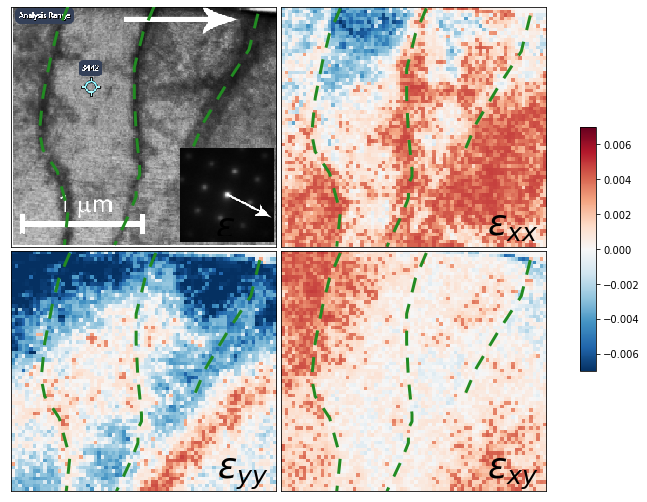

In [4]:
# create figure and set up subplots
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 9), 
                       gridspec_kw={'wspace': 0.02, 'hspace': 0.0, #'width_ratios': [1, 1, 0.06]
                                   })
#ax[0, 2].remove()
#ax[1, 2].remove()
#gs = ax[0, 0].get_gridspec()
#cax = fig.add_subplot(gs[:, -1])

# show grayscale TEM image
im0 = ax[0, 0].imshow(img, extent=(0, 74, 67, 0))

# show strain fields
im_kws = {'cmap': 'RdBu_r', 'vmin': -0.007, 'vmax': 0.007, 'aspect': 'equal'}
im1 = ax[0, 1].imshow(strain_xx, **im_kws)
im2 = ax[1, 0].imshow(strain_yy, **im_kws)
im3 = ax[1, 1].imshow(strain_xy, **im_kws)
plt.colorbar(im1, ax=ax, shrink=0.5, aspect=15)

# settings to be applied to all 4 subplots
for axis, label in zip(ax.flatten(), [r'{}', r'{xx}', r'{yy}', r'{xy}']):
    # show the green dashed lines
    show_dislocation_bundles(axis)
    
    # remove ticks and ticklabels
    axis.set(xticks=[], yticks=[], xticklabels=[], yticklabels=[])
    
    # add strain labels
    axis.text(57, 63, r"$\varepsilon_{}$".format(label), color='0', fontsize=36)   

## Average along the y direction
For the publication, each row of pixels is slightly shifted to the right or left according to the x-coordinate of the point on the green dashed line. This ensures that we average only over strain values that have the same horizontal distance from the green line. 

However, below we only average along the y direction for demonstration purposes. The "corrected" averaging shows mainly a more pronounced strain maximum (20% higher) where the dislocations are located.

Changing the `rows` value allows to only average the data inside this range. The data outside this range is shown in lighter colors (top and bottom of the left plot).

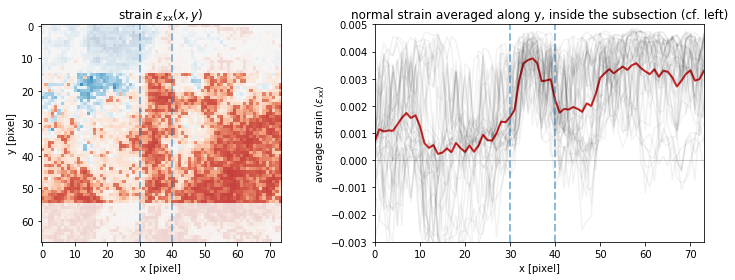

In [5]:
rows = range(15, 55)  # range to be used for averaging the strain in the wall

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 4), gridspec_kw={'wspace': 0.3, 'width_ratios': [1, 1.3]})

# left figure: plot originial xx strain
ax0.imshow(strain_xx, **im_kws)

# left figure: indicate the region limited 
z = np.zeros_like(strain_xy)
z[rows, :] = strain_xx[rows, :]
ax0.imshow(z, alpha=0.8, **im_kws)
ax0.set(xlabel='x [pixel]', ylabel='y [pixel]', title=r'strain $\varepsilon_{\rm xx}(x, y)$')

# right figure: strain averaged along vertical axis
av_strain_xx = np.mean(strain_xx[rows,:], axis=0)
ax1.plot(av_strain_xx, c='C3',lw=2);
ax1.plot(strain_xx[rows,:].T, c='0', alpha=0.05)
ax1.set(xlabel='x [pixel]', ylabel=r'average strain $\langle\varepsilon_{\rm xx}\rangle$', 
        xlim=(0, len(av_strain_xx) - 1), ylim=(-0.003, 0.005),
        title='normal strain averaged along y, inside the subsection (cf. left)')
ax1.axhline(0, alpha=0.2, lw=1, ls='-', c='0');

# show the width of the wall structure
for ax, x0 in product((ax0, ax1), (30, 40)):
    ax.axvline(x0, lw=2, ls='--', alpha=0.5)